In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.precision', 2)

In [3]:
ted = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## 1. Data overview

In [4]:
ted.shape

(2550, 17)

In [5]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [6]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [7]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [8]:
ted.describe(include = 'all')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
count,2550.00,2550,2550.00,2550,2.55e+03,2550.00,2550,2550,2550.00,2.55e+03,2550,2550,2544,2550,2550,2550,2.55e+03
unique,NaN,2550,NaN,355,NaN,NaN,2156,2550,NaN,NaN,2550,2550,1458,2530,2550,2550,NaN
top,NaN,Sir Ken Robinson makes an entertaining and pro...,NaN,TED2014,NaN,NaN,Hans Rosling,Ken Robinson: Do schools kill creativity?,NaN,NaN,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Writer,"['live music', 'music', 'performance']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,NaN
freq,NaN,1,NaN,84,NaN,NaN,9,1,NaN,NaN,1,1,45,3,1,1,NaN
mean,191.56,NaN,826.51,NaN,1.32e+09,27.33,NaN,NaN,1.03,1.34e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.70e+06
std,282.32,NaN,374.01,NaN,1.20e+08,9.56,NaN,NaN,0.21,9.46e+07,NaN,NaN,NaN,NaN,NaN,NaN,2.50e+06
min,2.00,NaN,135.00,NaN,7.46e+07,0.00,NaN,NaN,1.00,1.15e+09,NaN,NaN,NaN,NaN,NaN,NaN,5.04e+04
25%,63.00,NaN,577.00,NaN,1.26e+09,23.00,NaN,NaN,1.00,1.27e+09,NaN,NaN,NaN,NaN,NaN,NaN,7.56e+05
50%,118.00,NaN,848.00,NaN,1.33e+09,28.00,NaN,NaN,1.00,1.34e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.12e+06
75%,221.75,NaN,1046.75,NaN,1.41e+09,33.00,NaN,NaN,1.00,1.42e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.70e+06


In [9]:
ted.nunique()

comments               559
description           2550
duration              1083
event                  355
film_date              735
languages               66
main_speaker          2156
name                  2550
num_speaker              5
published_date        2490
ratings               2550
related_talks         2550
speaker_occupation    1458
tags                  2530
title                 2550
url                   2550
views                 2550
dtype: int64

In [10]:
ted.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. What talks provoke the most online discussion?

In [11]:
ted[['comments', 'views']].sort_values(by = 'comments', ascending = False)

,comments,views
96,6404,4374792
0,4553,47227110
644,3356,3433437
201,2877,21190883
1787,2673,2162764
...,...,...
2407,5,640734
2528,3,539207
2542,3,542088
2501,3,839040


In [12]:
# We should know the relationship between comments and views, because that let us know, how provokative was the talk
# We will create a new column call "comments_per_views"
ted['comments_per_view'] = ted['comments']/ted['views']

In [13]:
ted['comments_per_view'].sort_values(ascending = False)

744     2.22e-03
803     1.53e-03
96      1.46e-03
694     1.42e-03
954     1.36e-03
          ...   
2494    6.96e-06
2528    5.56e-06
2542    5.53e-06
2501    3.58e-06
2534    3.10e-06
Name: comments_per_view, Length: 2550, dtype: float64

In [14]:
# Now we apply sort_values and put the new variable inside, that show us what was the most commented talk
ted.sort_values('comments_per_view', ascending = False).head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,2.22e-03
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,1.53e-03
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,1.46e-03
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,1.42e-03
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,1.36e-03


In [15]:
ted.loc[744, 'description']

"Hours before New York lawmakers rejected a key marriage equality bill (38-24), State Senator Diane J. Savino made the passionate case for a government that recognizes and administers same-sex marriages. Here's her fresh, thought-provoking perspective on one of the most contentious issues in US culture, religion and government."

In [16]:
# The problem is the number of the column 'comments_per_view' can be a little tricky to intepreted, so 
# we are going to change the calculation a make a new column call: 'views_per_comment'
ted['views_per_comment'] = ted['views']/ted['comments']

In [17]:
# This is a most interpretable number, because tell us that every 450 of views, the talk generate a comment
ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,2.22e-03,450.53
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,1.53e-03,651.74
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,1.46e-03,683.13
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,1.42e-03,703.89
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,1.36e-03,735.53


## 3. Visualize the distribution of comments

<AxesSubplot:>

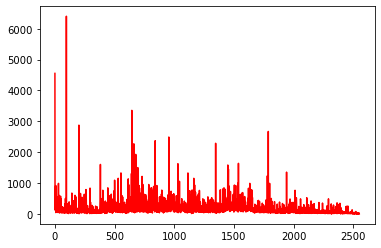

In [18]:
# Let's make a plot of the column comments
ted['comments'].plot(color = 'red')

<AxesSubplot:ylabel='Frequency'>

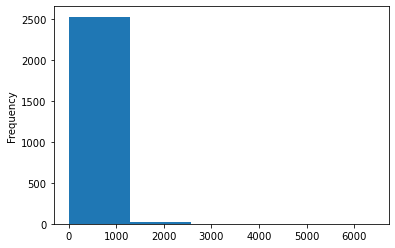

In [19]:
# Let's make a hustogram to see the frequency distribution
ted['comments'].plot(kind = 'hist', bins = 5)

<AxesSubplot:ylabel='Frequency'>

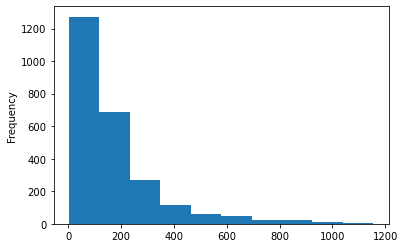

In [20]:
# We can apply a filter to the hist, to determine what happen with first group of comments, bewteen 0 and 1200
ted[ted.comments < 1200].comments.plot.hist()

<AxesSubplot:ylabel='Frequency'>

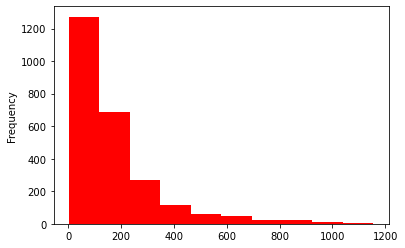

In [21]:
# There is a different way to write the code above with "query"
ted.query('comments < 1200')['comments'].plot.hist(color = 'red')

<AxesSubplot:ylabel='Frequency'>

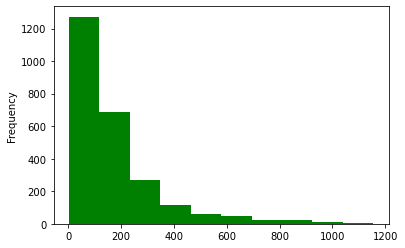

In [22]:
# And also with .loc
ted.loc[ted['comments'] < 1200, 'comments'].plot.hist(color = 'green')

## 4. Plot the number of talks that take place each year

In [23]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,9.64e-05,10372.75
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,8.28e-05,12077.43
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,7.58e-05,13195.90
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,1.18e-04,8487.75
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,4.94e-05,20245.98


In [24]:
ted['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'Justice with Michael Sandel',
       'Business Innovation Factory', 'TEDxTC',
       'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 

<AxesSubplot:>

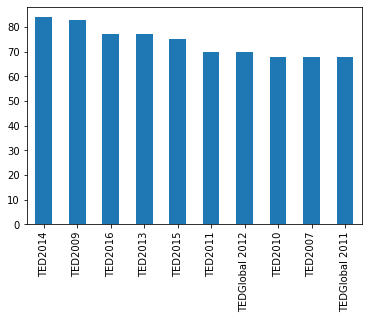

In [25]:
ted['event'].value_counts().head(10).plot(kind = 'bar')

In [26]:
ted['film_date'].head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [27]:
# First we should convert the column film_date to datetime
# But the function alone does not work
pd.to_datetime(ted['film_date'])

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [28]:
# We should add the argument unit='s', to pandas to recognize the data format 
# pd.to_datetime(1490195805, unit='s')
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
pd.to_datetime(ted['film_date'], unit = 's')

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [29]:
# Now we can create a new column with the correct format
ted['film_datetime'] = pd.to_datetime(ted['film_date'], unit = 's')

In [30]:
ted['film_datetime']

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_datetime, Length: 2550, dtype: datetime64[ns]

In [31]:
# We can confirm the data type again, to see the new column
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [32]:
# Now for the analysis we can use the selector "dt"
ted['film_datetime'].dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2004     33
2003     33
2002     27
1998      6
2001      5
1983      1
1972      1
1990      1
1994      1
1984      1
1991      1
Name: film_datetime, dtype: int64

<AxesSubplot:>

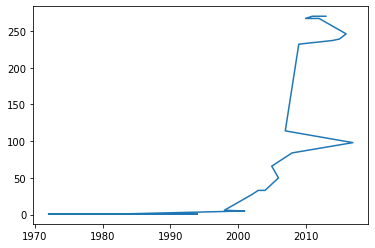

In [33]:
# We can make a line plot
ted['film_datetime'].dt.year.value_counts().plot()
# But the index and the data are not in the right order

<AxesSubplot:>

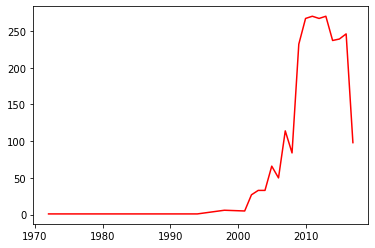

In [34]:
# To fix this problem, we should add the function sort_index() before the plot
ted['film_datetime'].dt.year.value_counts().sort_index().plot(color = 'red')

## 5. What were the best events in TED history to attend?

In [35]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment,film_datetime
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,9.64e-05,10372.75,2006-02-25
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,8.28e-05,12077.43,2006-02-25
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,7.58e-05,13195.90,2006-02-24
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,1.18e-04,8487.75,2006-02-26
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,4.94e-05,20245.98,2006-02-22


In [36]:
ted['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'Justice with Michael Sandel',
       'Business Innovation Factory', 'TEDxTC',
       'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 

In [37]:
ted['event'].value_counts()

TED2014              84
TED2009              83
TED2016              77
TED2013              77
TED2015              75
                     ..
NextGen:Charity       1
TEDxBG                1
TEDxNorthwesternU     1
TEDxSiliconValley     1
TEDxZurich            1
Name: event, Length: 355, dtype: int64

In [38]:
# We can answer this question, grouping by event and calculating the number of views
ted.groupby('event')['views'].mean().sort_values(ascending = False)
# The problem with this approximation is that we don't have the number of talks, maybe we can overlook some data

event
TEDxPuget Sound           3.43e+07
TEDxHouston               1.61e+07
TEDxBloomington           9.48e+06
TEDxCreativeCoast         8.44e+06
TEDxNorrkoping            6.57e+06
                            ...   
TEDxNASA@SiliconValley    1.56e+05
AORN Congress             1.50e+05
TEDxWaterloo              1.39e+05
TEDxIslay                 1.20e+05
The Do Lectures           1.12e+05
Name: views, Length: 355, dtype: float64

In [39]:
# A better approximation could be, use agregation function to count and sum the numbers of talks and the number of views
ted.groupby('event')['views'].agg(['count', 'mean', 'sum']).sort_values('sum', ascending = False)

,count,mean,sum
event,,,
TED2013,77,2.30e+06,177307937
TED2014,84,2.07e+06,174121423
TEDGlobal 2013,66,2.58e+06,170554736
TED2015,75,2.01e+06,150826305
TED2006,45,3.27e+06,147345533
...,...,...,...
TEDxNASA@SiliconValley,1,1.56e+05,155895
AORN Congress,1,1.50e+05,149818
TEDxWaterloo,1,1.39e+05,138812


## 6. Unpack the ratings data

In [40]:
ted.loc[0, 'ratings']

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [41]:
# The type of object is a string of dictionaries
type(ted.loc[0, 'ratings'])

str

In [42]:
# To separate the data we should convert the string to a list, importing the module "ast" and using the function
# ast.literal_eval()
import ast

In [43]:
# Using the funtion we don't see a string of dictionaires, now we can see a list
ast.literal_eval(ted.loc[0, 'ratings'])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [44]:
# To apply this to all the data frame we must define a custom function or use a lambda function
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [45]:
str_to_list(ted.loc[0, 'ratings'])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [46]:
# Now we have to use the function apply() to pass the function to all the Series
ted['ratings'].apply(str_to_list)

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [47]:
# We can use the function ast.literal_eval directly with apply, like this
ted['ratings'].apply(ast.literal_eval)

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [48]:
# Now we can create a new column with the list of ratings
ted['rating_list'] = ted['ratings'].apply(ast.literal_eval)

In [49]:
ted['rating_list'] 

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: rating_list, Length: 2550, dtype: object

In [50]:
ted.loc[0, 'rating_list'] 

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [51]:
# How to split a pandas column with a list of dicts into separate columns for each key
# https://stackoverflow.com/questions/65621510/how-to-split-a-pandas-column-with-a-list-of-dicts-into-separate-columns-for-each

## 7. Count the total number of rating received by each talk

In [52]:
# This is what we have
ted.loc[0, 'rating_list'] 

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [53]:
# To catch the values of one of the elements of the dict, we should use a function
def get_num_ratings(list_of_dicts):
    return list_of_dicts[0]['count']

In [54]:
# Now we pass the function to one element of the Series to see if it works
# but this only give us one element of the list
get_num_ratings(ted.loc[0, 'rating_list'])

19645

In [55]:
# We have to customize the function, to iterate through all the list of dicts. We'll do this using a for loop
def get_num_ratings(list_of_dicts):
    num = 0 #Empieza en 0
    for d in list_of_dicts:
        num = num + d['count'] # Itera a traves de la lista, y va extrayendo y sumando los valores de 'count'
    return num

In [56]:
# Now we pass the function again, and we'll see the total count of that list of dictionaries in the variable 'count'
get_num_ratings(ted.loc[0, 'rating_list'])

93850

In [57]:
get_num_ratings(ted.loc[1, 'rating_list'])

2936

In [58]:
# Usinga apply() we can apply this function to the Series
ted['rating_list'].apply(get_num_ratings)

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: rating_list, Length: 2550, dtype: int64

In [59]:
# Now we can create a new column with the total of 'count'
ted['num_rating'] = ted['rating_list'].apply(get_num_ratings)

In [60]:
ted['num_rating']

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: num_rating, Length: 2550, dtype: int64

In [61]:
# Another option to do this, it is create a data frame and put inside the column and the element
# this will transform the list in a data frame we all the elements separated
pd.DataFrame(ted.loc[1,'rating_list'])

,id,name,count
0,7,Funny,544
1,3,Courageous,139
2,2,Confusing,62
3,1,Beautiful,58
4,21,Unconvincing,258
5,11,Longwinded,113
6,8,Informative,443
7,10,Inspiring,413
8,22,Fascinating,132
9,9,Ingenious,56


## 8. Which occupations deliver the funniest the talks on average? 

In [62]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment,film_datetime,rating_list,num_rating
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,9.64e-05,10372.75,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,8.28e-05,12077.43,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,7.58e-05,13195.90,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",2824
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,1.18e-04,8487.75,2006-02-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",3728
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,4.94e-05,20245.98,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620


## Step 1: Count the number of funny ratings

In [63]:
ted['rating_list'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [64]:
# First we need to check is every row has a value of the funny condition
# and the result shows, that every row has the value
ted['ratings'].str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [65]:
# Now we should create a function to iterate in the dictionary, and extract the values of the name 'Funny'
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [66]:
# Now we should use the apply() method to apply this function to all the Series
ted['rating_list'].apply(get_funny_ratings)

0       19645
1         544
2         964
3          59
4        1390
        ...  
2545        1
2546       20
2547        1
2548       63
2549        0
Name: rating_list, Length: 2550, dtype: int64

In [67]:
# Now we can create a new column called funny_ratings
ted['funny_ratings'] = ted['rating_list'].apply(get_funny_ratings)

In [68]:
ted['funny_ratings'].head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

## Step 2: Determine the funny rate

In [69]:
# To determine the funny rate, we should create a variable diving 'funny_ratings'/num_rating *100
ted['funny_rate'] = ted['funny_ratings']/ted['num_rating']*100

In [70]:
ted['funny_rate']

0       20.93
1       18.53
2       34.14
3        1.58
4        5.43
        ...  
2545     0.52
2546    13.25
2547     0.74
2548    10.81
2549     0.00
Name: funny_rate, Length: 2550, dtype: float64

In [71]:
# Now we can try to reveale the relationship funny rate and speaker occupation
ted.sort_values('funny_rate', ascending = False)['speaker_occupation'].head(10)
# The relationship tell us, that most funniest talk were made for comedians and writers

685     Actor, comedian, playwright
1398                       Comedian
747                        Comedian
173                        Investor
2114            Comedian and writer
2273            Comedian and writer
194                        Jugglers
21             Humorist, web artist
675                  Data scientist
568                        Comedian
Name: speaker_occupation, dtype: object

### Step 3: Analyze the funny rate by occupation

In [72]:
# To analyze each occupation individually, we can use groupby and ordering by occupation
ted.groupby('speaker_occupation')['funny_rate'].mean().sort_values(ascending = False).head(10)

speaker_occupation
Comedian and writer            60.21
Jugglers                       56.68
Actor, comedian, playwright    55.81
Actor, writer                  51.52
Comedian                       51.25
Satirist                       51.24
Cartoon editor                 51.16
Comedian, voice artist         50.35
Social energy entrepreneur     50.21
Science humorist               46.84
Name: funny_rate, dtype: float64

In [73]:
occupation = ted.groupby('speaker_occupation')

In [74]:
occupation.get_group('Comedian and writer')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,comments_per_view,views_per_comment,film_datetime,rating_list,num_rating,funny_ratings,funny_rate
2114,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,1449532800,43,James Veitch,James Veitch: This is what happens when you re...,1,1452269020,...,This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is...,20475972,7.33e-06,136506.48,2015-12-08,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...",12366,7731,62.52
2273,46,It happens to all of us: you unsubscribe from ...,460,TEDSummit,1467158400,37,James Veitch,James Veitch: The agony of trying to unsubscribe,1,1472828989,...,The agony of trying to unsubscribe,https://www.ted.com/talks/james_veitch_the_ago...,5711833,8.05e-06,124170.28,2016-06-29,"[{'id': 7, 'name': 'Funny', 'count': 2210}, {'...",3817,2210,57.90


In [75]:
ted['speaker_occupation'].describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

## Step 4: Focus on occupation that are well represented in the data

In [76]:
# If we check the unique values of the column 'speaker_occupation', we will see that are many thare represented just once
ted['speaker_occupation'].value_counts()
# This can be misleading to our analysis. Because of that, we will create filter to count only the occupation that have a least
# five talks

Writer                  45
Artist                  34
Designer                34
Journalist              33
Entrepreneur            31
                        ..
Science author           1
Pro snowboarder          1
Artist, urban farmer     1
Entrepreneur, author     1
 Robotics engineer       1
Name: speaker_occupation, Length: 1458, dtype: int64

In [77]:
occupation_counts = ted['speaker_occupation'].value_counts()

In [78]:
# Now we can filter this variable and catch the index (which say the name of the occupation)
occupation_counts[occupation_counts >= 5].index

Index(['Writer', 'Artist', 'Designer', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Economist', 'Author', 'Neuroscientist', 'Educator', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Musician', 'Marine biologist',
       'Activist', 'Global health expert; data visionary', 'Technologist',
       'Graphic designer', 'Historian', 'Philanthropist', 'Astronomer',
       'Behavioral economist', 'Oceanographer', 'Singer/songwriter', 'Poet',
       'Futurist', 'Engineer', 'Computer scientist', 'Social psychologist',
       'Novelist', 'Mathematician', 'Astrophysicist', 'Social entrepreneur',
       'Photojournalist', 'Writer, activist', 'Evolutionary biologist',
       'Legal activist', 'Climate advocate', 'Techno-illusionist',
       'Singer-songwriter', 'Comedian', 'Performance poet, multimedia artist',
       'Reporter', 'Paleontologist', 'Chemist', 'Cartoonist',
       'Investor and advocate for moral lea

In [79]:
# Now we can create a new variable with the indexes, as a result we will have an index
top_occupations = occupation_counts[occupation_counts >= 5].index

In [80]:
# Using the new variable 'top_occupations' and the funcion "isin()", we can check where are the most common ocuppations
# in the data frame
ted[ted['speaker_occupation'].isin(top_occupations)].head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,comments_per_view,views_per_comment,film_datetime,rating_list,num_rating,funny_ratings,funny_rate
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,8.28e-05,12077.43,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544,18.53
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,4.94e-05,20245.98,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390,5.43
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,...,Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,4.75e-05,21037.85,2006-02-23,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",1024,9,0.88
11,55,Jehane Noujaim unveils her 2006 TED Prize wish...,1538,TED2006,1140912000,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,1,1153786260,...,My wish: A global day of film,https://www.ted.com/talks/jehane_noujaim_inspi...,387877,1.42e-04,7052.31,2006-02-26,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...",592,5,0.84
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,1140652800,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,1154391060,...,One Laptop per Child,https://www.ted.com/talks/nicholas_negroponte_...,358304,2.76e-04,3619.23,2006-02-23,"[{'id': 3, 'name': 'Courageous', 'count': 83},...",781,14,1.79


In [81]:
# Using the last filter, we create a new variable
ted_top_occupations = ted[ted['speaker_occupation'].isin(top_occupations)]

In [82]:
ted_top_occupations.shape

(786, 24)

In [83]:
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values(ascending = False).head(20)

speaker_occupation
Comedian                                51.25
Performance poet, multimedia artist     30.65
Singer/songwriter                       25.22
Producer                                20.25
Data scientist                          18.41
Cartoonist                              16.21
Techno-illusionist                      15.22
Graphic designer                        13.57
Poet                                    10.74
Global health expert; data visionary     9.03
Artist                                   7.89
Author                                   7.55
Entrepreneur                             7.33
Novelist                                 7.09
Evolutionary biologist                   6.92
Reporter                                 6.62
Game designer                            6.23
Writer                                   6.07
Designer                                 5.93
Science writer                           5.60
Name: funny_rate, dtype: float64